# Step 1 - Retrieve PubMed Data


## 1.1 - Retrieve all PMIDS for search query

PubMed has imposed a new limit of 10,000 records per retrieval

Thus, I split my query into 5 batches, each one spanning 3 years of publication dates

Each query filtered for studies that were not systematic reviews, meta-analyses or reviews

`esearch -db pubmed -query "(((Disorders of consciousness) NOT (\"review\"[Publication Type])) NOT (\"systematic review\"[Publication Type])) NOT (\"meta analysis\"[Publication Type])"`

These are the 5 queries that were made to retrieve PMIDs for studies done between 2000 and 2023

```esearch -db pubmed -query "(((Disorders of consciousness) NOT (\"review\"[Publication Type])) NOT (\"systematic review\"[Publication Type])) NOT (\"meta analysis\"[Publication Type])" -datetype PDAT -mindate 2016 -maxdate 2019 | efetch -db pubmed -format uid > PMID2016-2019.txt```

```esearch -db pubmed -query "(((Disorders of consciousness) NOT (\"review\"[Publication Type])) NOT (\"systematic review\"[Publication Type])) NOT (\"meta analysis\"[Publication Type])" -datetype PDAT -mindate 2012 -maxdate 2015 | efetch -db pubmed -format uid > PMID2012-2015.txt```

```esearch -db pubmed -query "(((Disorders of consciousness) NOT (\"review\"[Publication Type])) NOT (\"systematic review\"[Publication Type])) NOT (\"meta analysis\"[Publication Type])" -datetype PDAT -mindate 2008 -maxdate 2011 | efetch -db pubmed -format uid > PMID2008-2011.txt```

```esearch -db pubmed -query "(((Disorders of consciousness) NOT (\"review\"[Publication Type])) NOT (\"systematic review\"[Publication Type])) NOT (\"meta analysis\"[Publication Type])" -datetype PDAT -mindate 2004 -maxdate 2007 | efetch -db pubmed -format uid > PMID2004-2007.txt```

```esearch -db pubmed -query "(((Disorders of consciousness) NOT (\"review\"[Publication Type])) NOT (\"systematic review\"[Publication Type])) NOT (\"meta analysis\"[Publication Type])" -datetype PDAT -mindate 2000 -maxdate 2003 | efetch -db pubmed -format uid > PMID2000-2003.txt```


These were then concatenated into a single file:
    
`cat PMID2000-2003.txt PMID2004-2007.txt PMID2008-2011.txt PMID2012-2015.txt PMID2016-2019.txt PMID2020-2023.txt > PMID2000-2023.txt`

This file had a total of 24944 PMIDs

## 1.2 - Create a folder of .txt Abstracts

Iterate over PMIDs to retrieve the abstracts

In [1]:
#take a list of PMIDs
#loop over all of them
#write their abstract contents into txt files
#Path to PMID list: /Users/manojarachige/Documents/Coding/BMedScDOC1/BMedScDOC2021/Abstracts/Txt_Files/PMID_numbers


#Firstly, navigate to empty folder
#run python abstract_get.py
import urllib.request
import os

PMID_list = "/Users/manojarachige/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/PMIDtotal.txt"

os.chdir("/Users/manojarachige/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/Abstracts_All")

counter = 1
with open(PMID_list, "r") as file:
    for line in file:
        #keep track
        #print("PMID: ", line, "  ", counter)
        counter += 1
        
        try:
            url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id={0}&retmode=text&rettype=abstract".format(line.strip("\n"))
            abst = urllib.request.urlopen(url)
        
            with open("{}.txt".format(line.strip()), "w") as output:
                for line in abst:
                    decoded_line = line.decode("utf-8")
                    output.write(decoded_line)
                output.close()
        except:
            pass

Folder of abstracts created


## 1.2 - Create a folder of downloaded PDF files

Iterate over PMIDs to retrieve PDFs

Use:

```~BMedScDOC_2023/Get_PDFs/fetch_pdfsmp-2working.py```

to download Open Source PDFs

Then use:

```~BMedScDOC_2023/Get_PDFs/pdf_separate.py```

to separate valid vs broken PDFs.

## 1.3 - Convert all PDFs to .txt files

This can be done by running the command:

```python3 BMedScDOC1_v7.2.py /Users/manojarachige/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt /Users/manojarachige/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/PDFs_Valid /Users/manojarachige/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi.csv```

This launches the BMedSc DOC1_v7.2.py program that converts all pdfs in the. "PDFs_Valid" folder to txt files and does a preliminary count of the dictionary words. 
In this case, the aalbi dictionary is being used, based on the AAL3 anatomical atlas

Here is an output graph of the word count.
A TDM of the "PDFs_Valid" corpus is also created

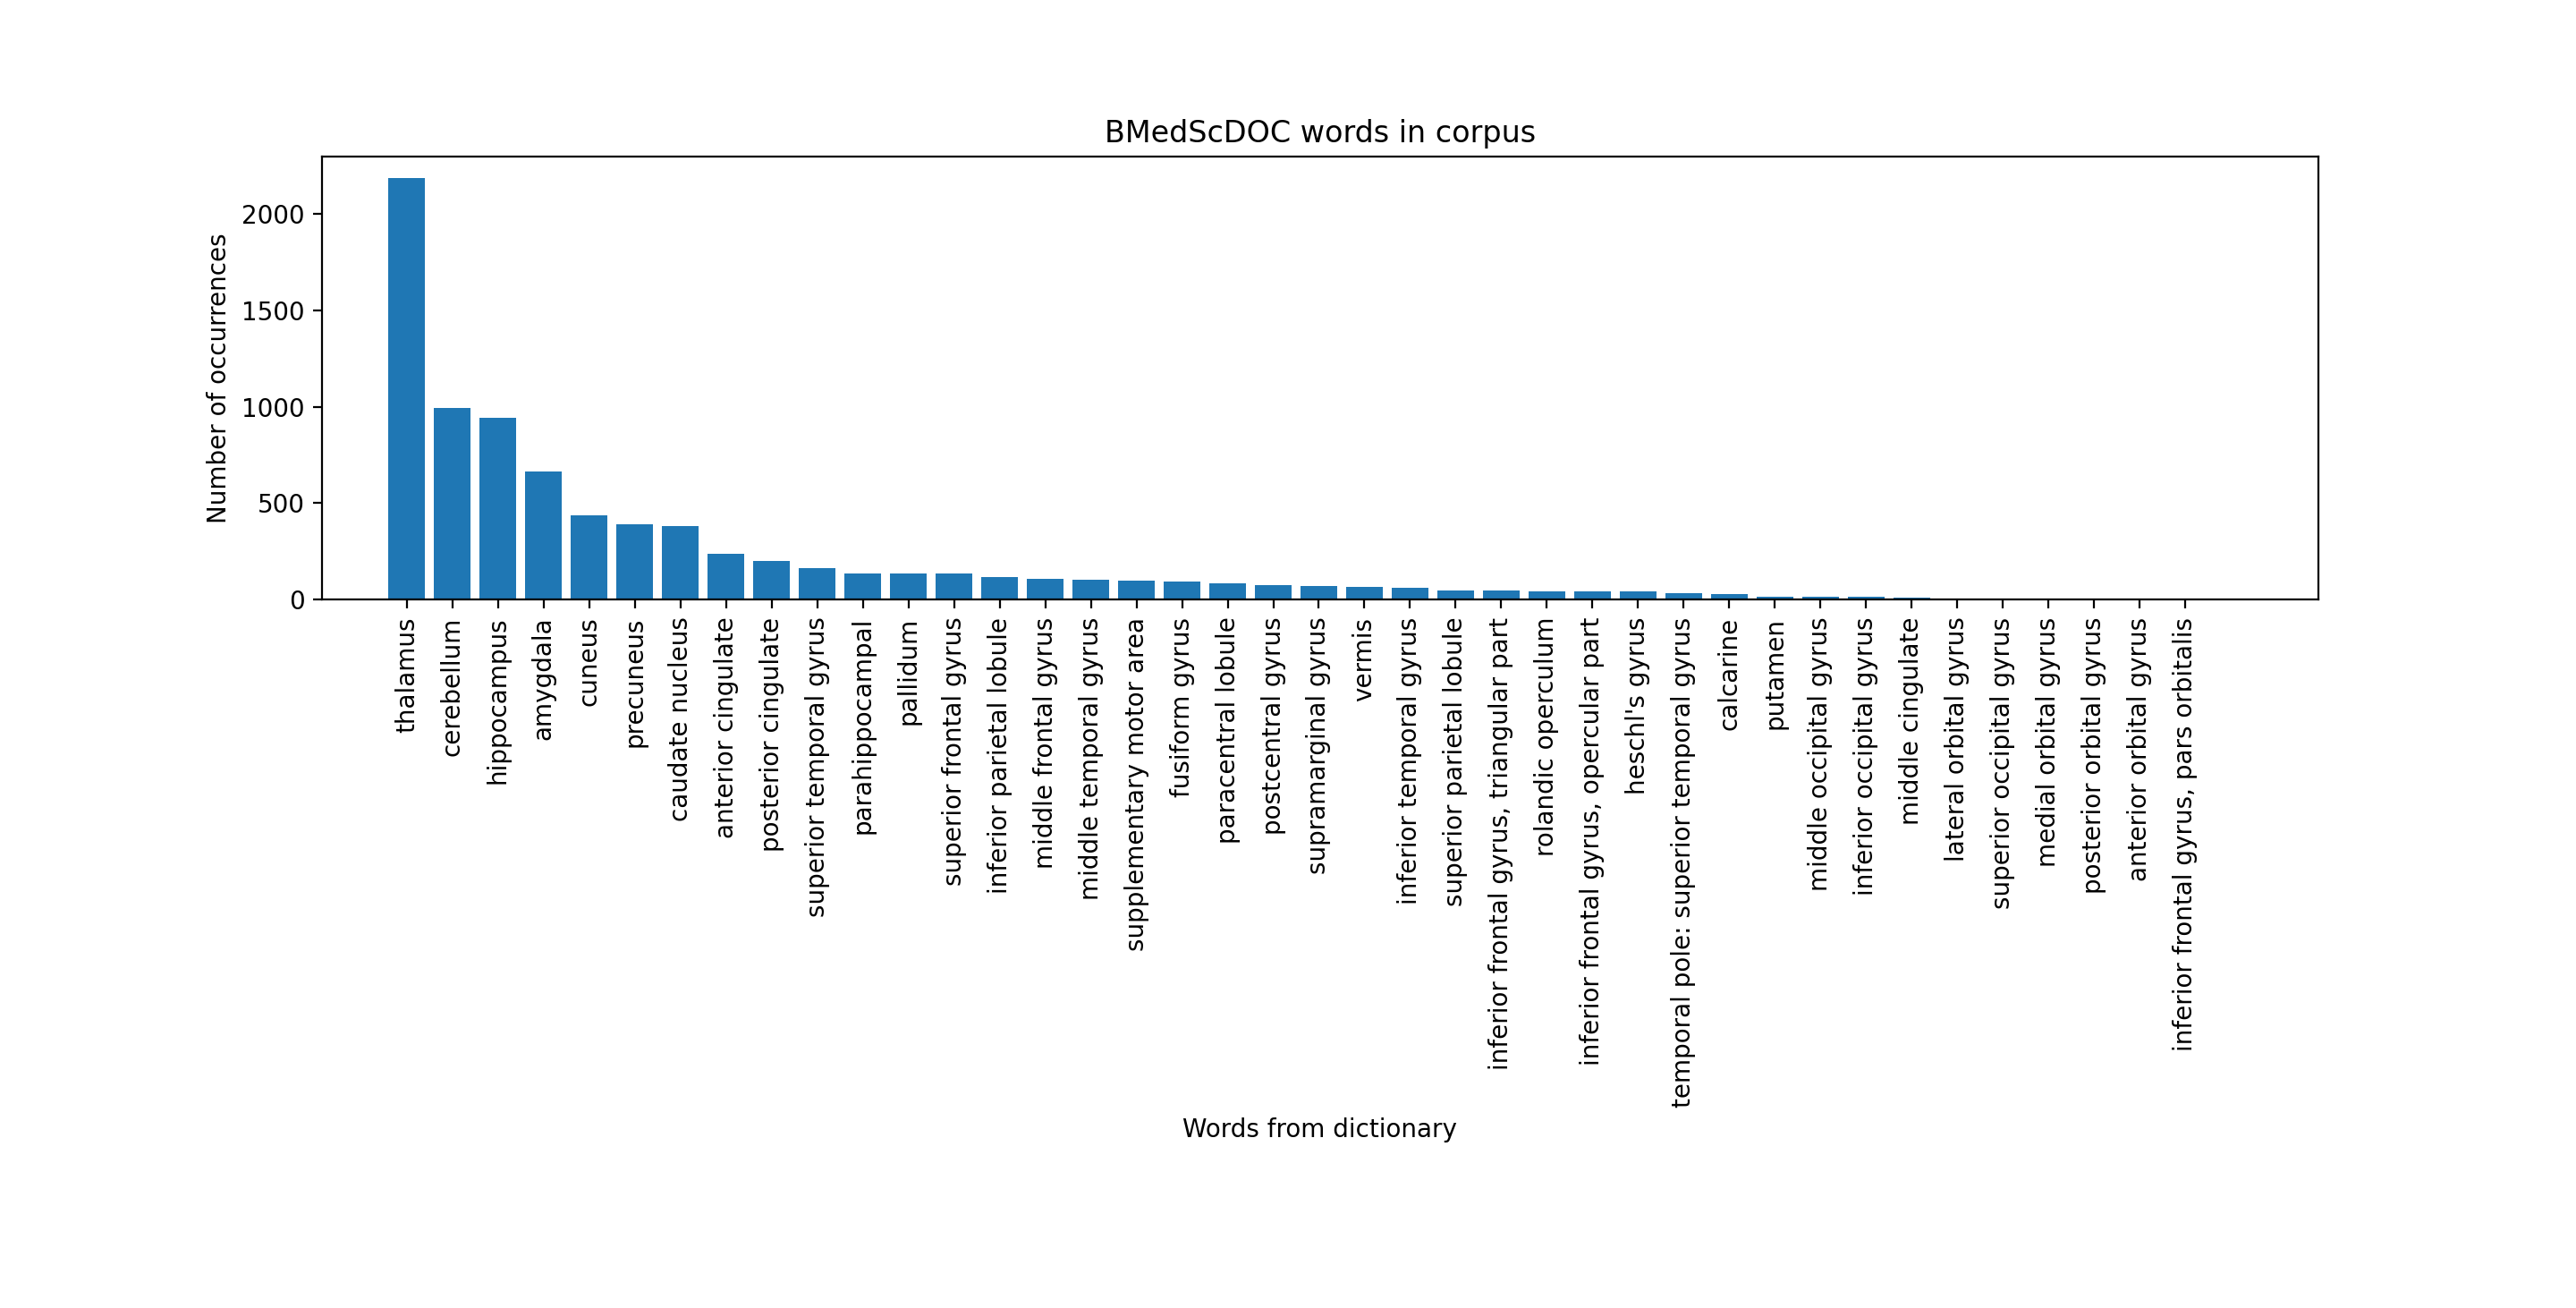

This concludes data collection.

We now have:
- A folder of all abstract txts (24,239)
- A folder of all PDF full texts (7631)
- A folder of all Valid PDF full texts (3780)
- A folder of all Valid txt full texts (3780)
- An initial Wordcount overview
- A TDM of the entire full texts corpus